In [23]:
# auto-reload modules when they have changed
%reload_ext autoreload
%autoreload 2

In [24]:
import sys  
import os

# get path to project folder
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, project_path)


In [25]:
# Import modules
from config import config as cfg
from modules.load import image

import numpy as np
from skimage.feature import blob_log

from math import sqrt
from skimage import color, data, feature
from skimage.feature import blob_dog, blob_log, blob_doh

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle

from PIL import Image


In [26]:
# Load image data from path (creates an image object)
im = image.load_from_path(cfg.image_FIDA_path)

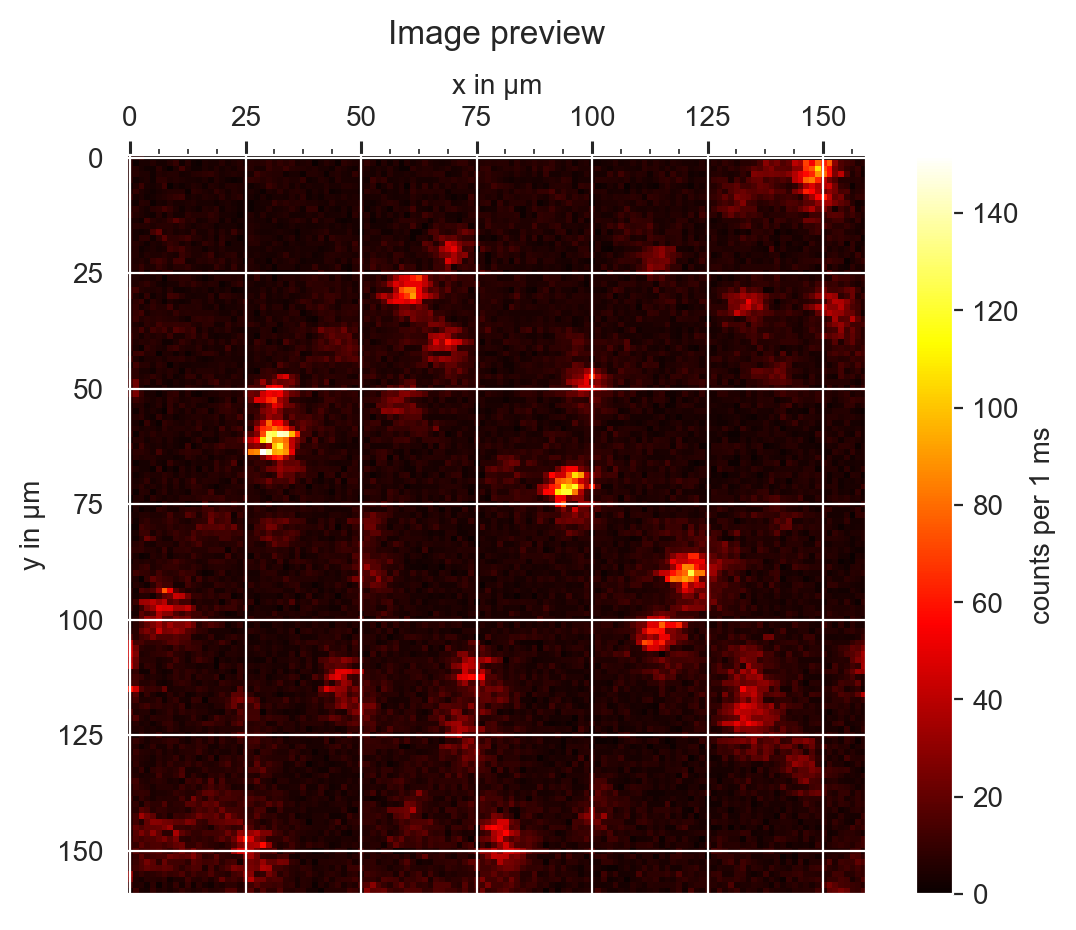

Data (arrays) in image file:
  - preview : (128, 128), int64
  -    APD1 : (128, 128), int64
  -    APD2 : (128, 128), int64




In [27]:
# Preview image
im.preview()

In [28]:
# Blob detection for image
def detect_spots(image, max_sigma=30, threshold=0.1):
    # Perform blob detection
    blobs = blob_log(image, max_sigma=max_sigma, threshold=threshold)

    # Compute maximum and average intensity of each spot
    spot_data = []
    for blob in blobs:
        y, x, radius = blob
        y, x, radius = int(y), int(x), int(radius)

        spot_intensity = image[y, x]
        spot_data.append({
            'max_intensity': spot_intensity,
            'avg_intensity': spot_intensity
        })

    return spot_data

In [29]:
# Perform blob detection on image
print(im.data['preview'])
spot_data = detect_spots(im.data['preview'], max_sigma=100, threshold=10)

[[ 6  5  8 ...  0  0  0]
 [ 7  1  4 ... 11  5  7]
 [ 7  6  4 ...  7 11  3]
 ...
 [26  5  3 ...  4  8 15]
 [11  5  6 ... 11 10  7]
 [ 3 11  4 ... 11 10 15]]


In [30]:
print(spot_data)

[]


In [31]:
for spot in spot_data:
    print("Max Intensity:", spot['max_intensity'])
    print("Average Intensity:", spot['avg_intensity'])
    print()

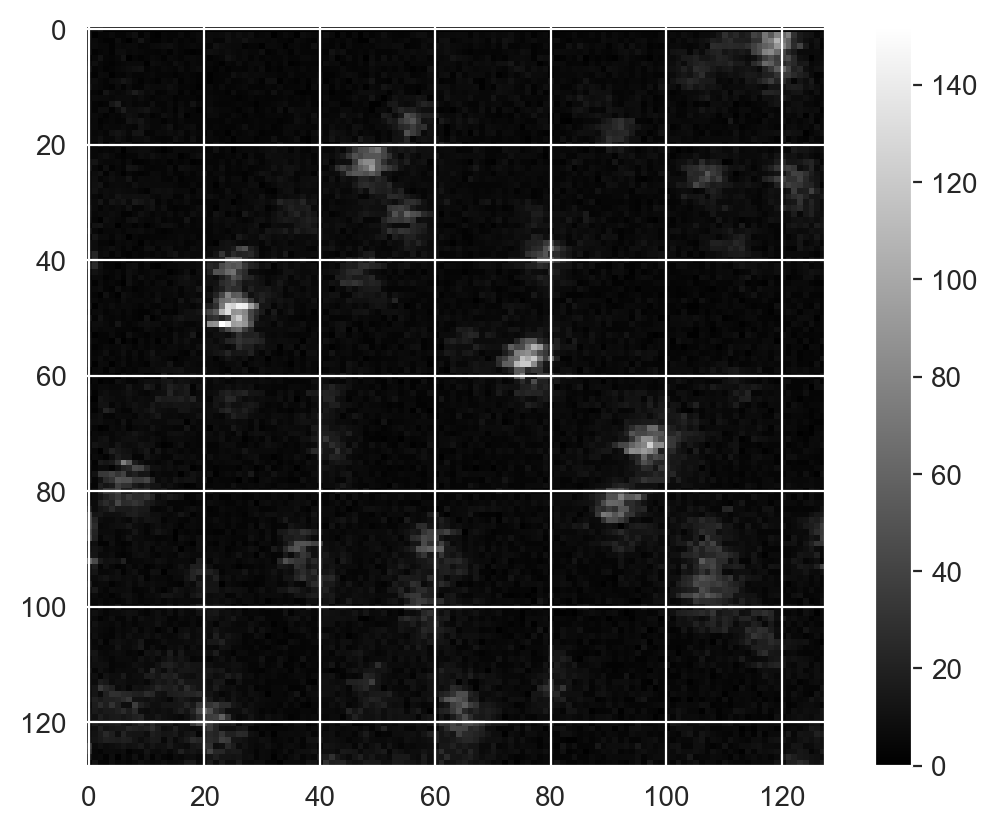

In [32]:
image_array = im.data['preview']
#im.preview()

#img = Image.fromarray((image_array * 255).astype(np.uint8))
img = Image.fromarray(image_array.astype(np.uint8))
# Invert image
#img = Image.eval(img, lambda x: 255 - x)


plt.imshow(img, cmap='gray')

plt.colorbar()

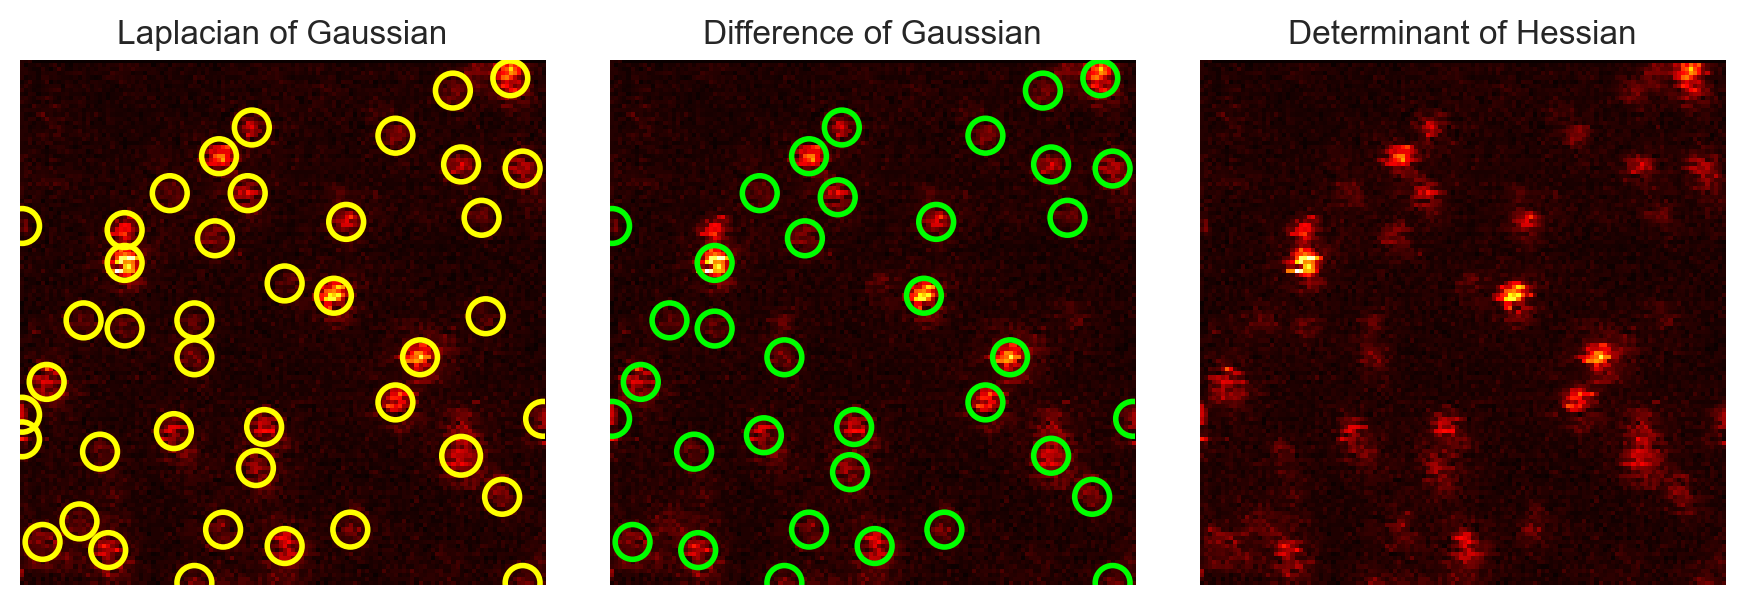

[[ 49.          25.           4.24264069]
 [ 57.          76.           4.24264069]
 [ 72.          97.           4.24264069]
 [ 23.          48.           4.24264069]
 [  4.         119.           4.24264069]
 [ 83.          91.           4.24264069]
 [ 39.          79.           4.24264069]
 [118.          64.           4.24264069]
 [ 89.          59.           4.24264069]
 [ 96.         107.           4.71404521]
 [ 78.           6.           4.24264069]
 [ 41.          25.           4.24264069]
 [ 25.         107.           4.24264069]
 [119.          21.           4.24264069]
 [ 90.          37.           4.24264069]
 [ 32.          55.           4.24264069]
 [ 26.         122.           4.24264069]
 [ 16.          56.           4.24264069]
 [ 87.         127.           4.24264069]
 [ 18.          91.           4.24264069]
 [ 43.          47.           4.24264069]
 [ 99.          57.           4.24264069]
 [ 86.           0.           4.24264069]
 [106.         117.           4.24

In [33]:
blobs_log = blob_log(img, max_sigma=4, min_sigma=3, num_sigma=10, threshold=.01)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(img, max_sigma=4, min_sigma=3, threshold=.01)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(img, max_sigma=4, min_sigma=3, num_sigma=1, threshold=.1)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img, cmap='hot')
    for blob in blobs:
        y, x, r = blob
        c = Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()
print(blobs_log)

In [34]:
blobs = []

for blob in blobs_log:
    # Get blob coordinates and radius
    y, x, r = blob

    # Extract blob pixels from original image
    blob_pixels = image_array[int(y - r):int(y + r), int(x - r):int(x + r)]

    # Do something with blob pixels
    # ...
    print(blob_pixels)
    print(blob_pixels.shape)

    if blob_pixels.shape[0] == blob_pixels.shape[1]: 
        blobs.append(blob_pixels)
    else: 
        print("Blob not square")

    #plt.imshow(blob_pixels, cmap='gray')
    #plt.show()



[[  9  10  11  25  30  37  24  13  14]
 [  6   5  13  18  32  26  27  10  19]
 [  7  11  21  41  78  53  56  32  10]
 [  4   6  38  64  69  82  72  62  34]
 [ 15  18  28  71 129 125 144 141  97]
 [ 29  40  53 108 132  87  90  80  41]
 [  9  26  30  21  36 100 121  84  42]
 [ 14  83  87 152 138  93  97  89  51]
 [  4   9   8  24  42  57  63  36  21]]
(9, 9)
[[  6   7  12  12   6  10   7  14  11]
 [  7   5   7   5   8  14  14  15  10]
 [  8   8   7  22  41  54  54  25  17]
 [  9  23  56  43  45  74 106  91  42]
 [  6  17  30  74  80  86  69  44  34]
 [ 29  38  60  68 114 101 118  74  38]
 [ 27  56  58 108 120 120  83  37  14]
 [  5  11  19  53  52  24  31  30  12]
 [ 11   6  11  52  72  12   8  33  33]]
(9, 9)
[[  8   8  10  11  13   7  13  18  13]
 [  5  15  13  14  16  16  17  13  13]
 [  7  16  27  38  36  63  64  32  22]
 [ 13  22  50  41  42  49  52  51  23]
 [ 13  13  31  57  86  84  60  44  35]
 [ 41  43  59  71  79 124  83  83  35]
 [ 10  58  84  81  92  82  64  18  21]
 [  9   7

[]


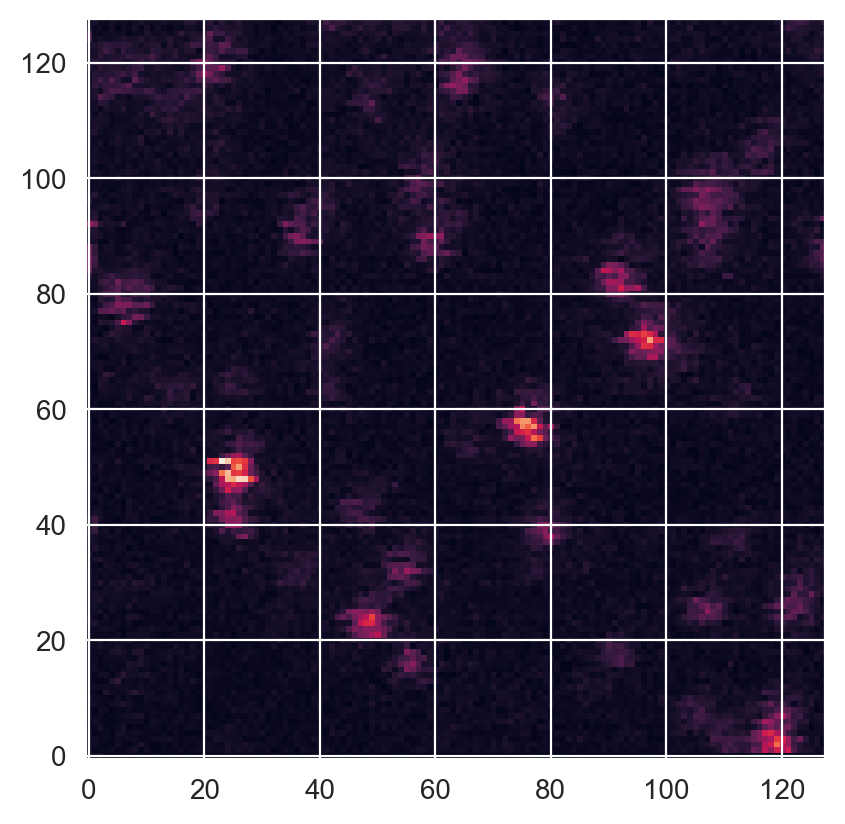

In [35]:
blobs_log = blob_log(image_array, min_sigma = 5, max_sigma=10, num_sigma=50, threshold=50)

### Play with the paramters above this line ###
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

print(blobs_log)

ax = plt.gca()
ax.imshow(image_array,origin='lower')
cnt = 0
while cnt < len(blobs_log):
    c = Circle((blobs_log[cnt][1], blobs_log[cnt][0]), blobs_log[cnt][2], color='white', linewidth=5, fill=False)
    ax.add_patch(c)
    cnt = cnt + 1
plt.show()

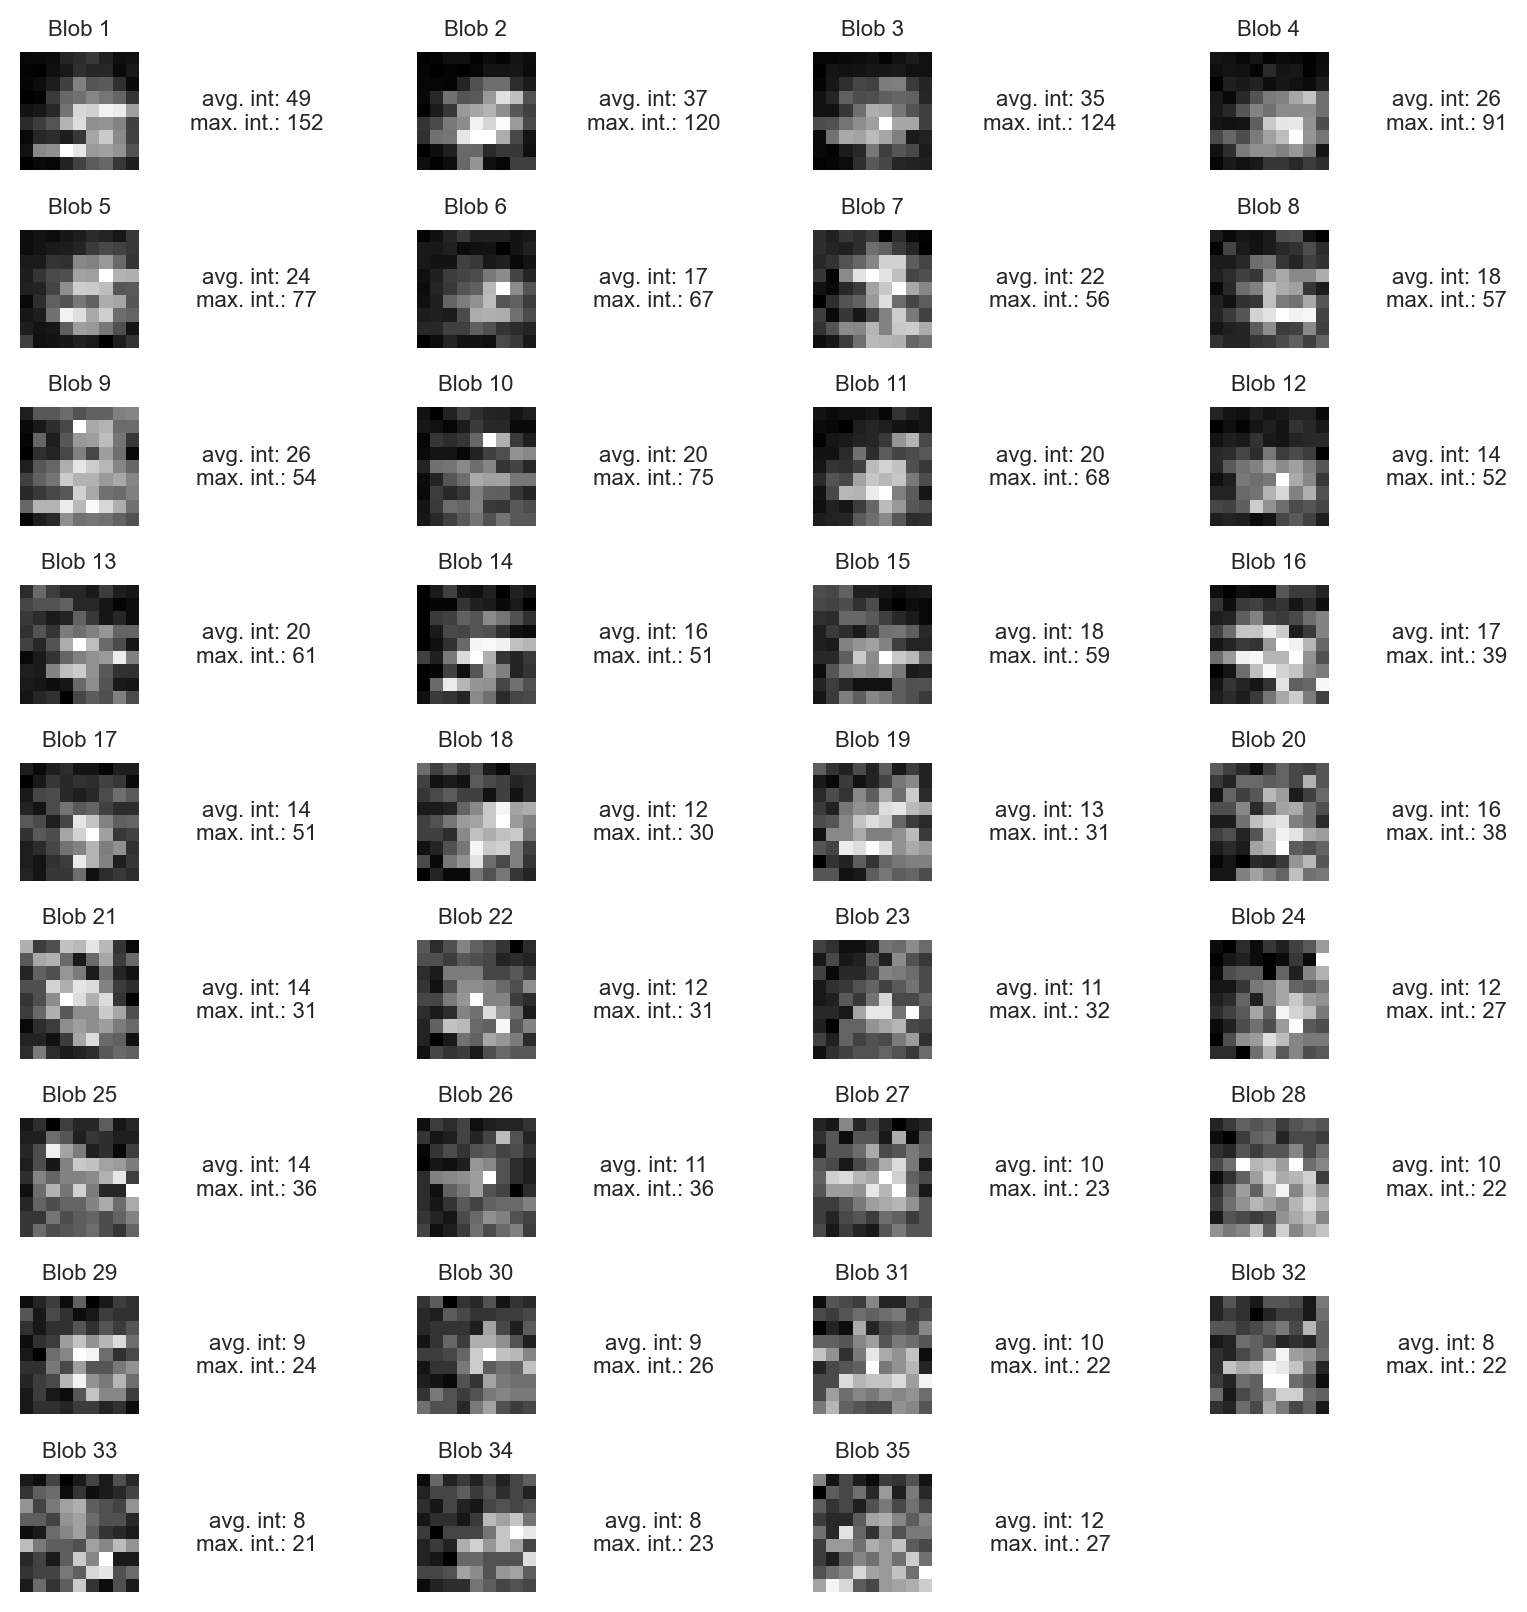

In [36]:
import matplotlib.pyplot as plt

# Create grid of subplots
num_subplots = len(blobs)
num_cols = 4
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Create list to store average intensities
avg_intensities = []
max_intensities = []

# Loop over blobs and plot in subplots
for i, blob in enumerate(blobs):
    # Calculate average intensity
    avg_intensity = np.mean(blob)

    # Calculate max intensity
    max_intensity = np.max(blob)

    avg_intensities.append(avg_intensity)
    max_intensities.append(max_intensity)

    # Plot blob in subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(blob, cmap='gray')
    ax.set_title(f'Blob {i+1}', fontsize=8)
    plt.subplots_adjust(hspace = 0.5)
    plt.subplots_adjust(wspace = 0.1)
    ax.text(2, 0.5, f'avg. int: {int(avg_intensity)}\nmax. int.: {int(max_intensity)}', size=8, ha="center", va="center", bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)
    ax.set_axis_off()

# Hide unused subplots
for i in range(num_subplots, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.axis('off')

#plt.tight_layout()
plt.axis
plt.show()

[49.80246913580247, 37.93827160493827, 35.54320987654321, 26.82716049382716, 24.74074074074074, 17.666666666666668, 22.123456790123456, 18.641975308641975, 26.34567901234568, 20.246913580246915, 20.864197530864196, 14.987654320987655, 20.08641975308642, 16.88888888888889, 18.493827160493826, 17.938271604938272, 14.728395061728396, 12.296296296296296, 13.222222222222221, 16.061728395061728, 14.271604938271604, 12.160493827160494, 11.123456790123457, 12.308641975308642, 14.962962962962964, 11.444444444444445, 10.074074074074074, 10.753086419753087, 9.691358024691358, 9.481481481481481, 10.08641975308642, 8.91358024691358, 8.604938271604938, 8.333333333333334, 12.703703703703704]


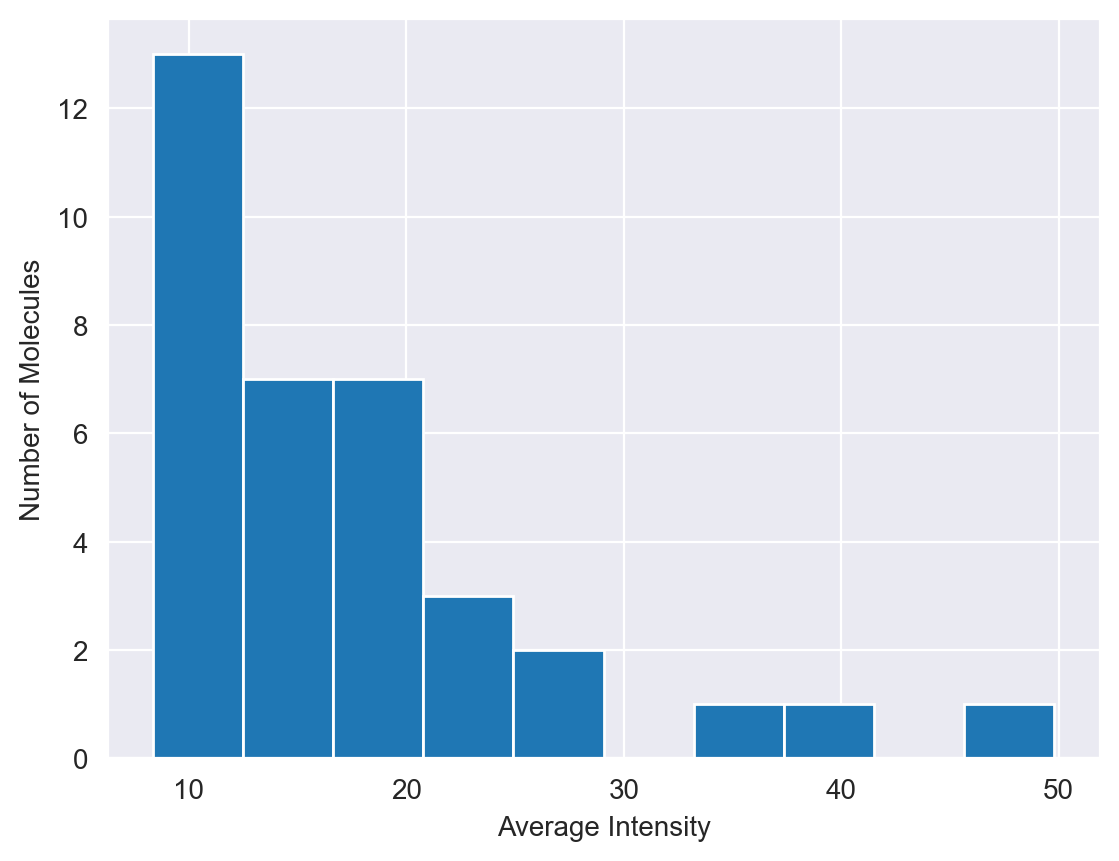

In [37]:
print(avg_intensities)

# Compute histogram of average intensities
hist, bins = np.histogram(avg_intensities, bins=10)

# Plot histogram
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')
plt.xlabel('Average Intensity')
plt.ylabel('Number of Molecules')
plt.show()

[50, 38, 36, 27, 25, 18, 22, 19, 26, 20, 21, 15, 20, 17, 18, 18, 15, 12, 13, 16, 14, 12, 11, 12, 15, 11, 10, 11, 10, 9, 10, 9, 9, 8, 13]
[152, 120, 124, 91, 77, 67, 56, 57, 54, 75, 68, 52, 61, 51, 59, 39, 51, 30, 31, 38, 31, 31, 32, 27, 36, 36, 23, 22, 24, 26, 22, 22, 21, 23, 27]


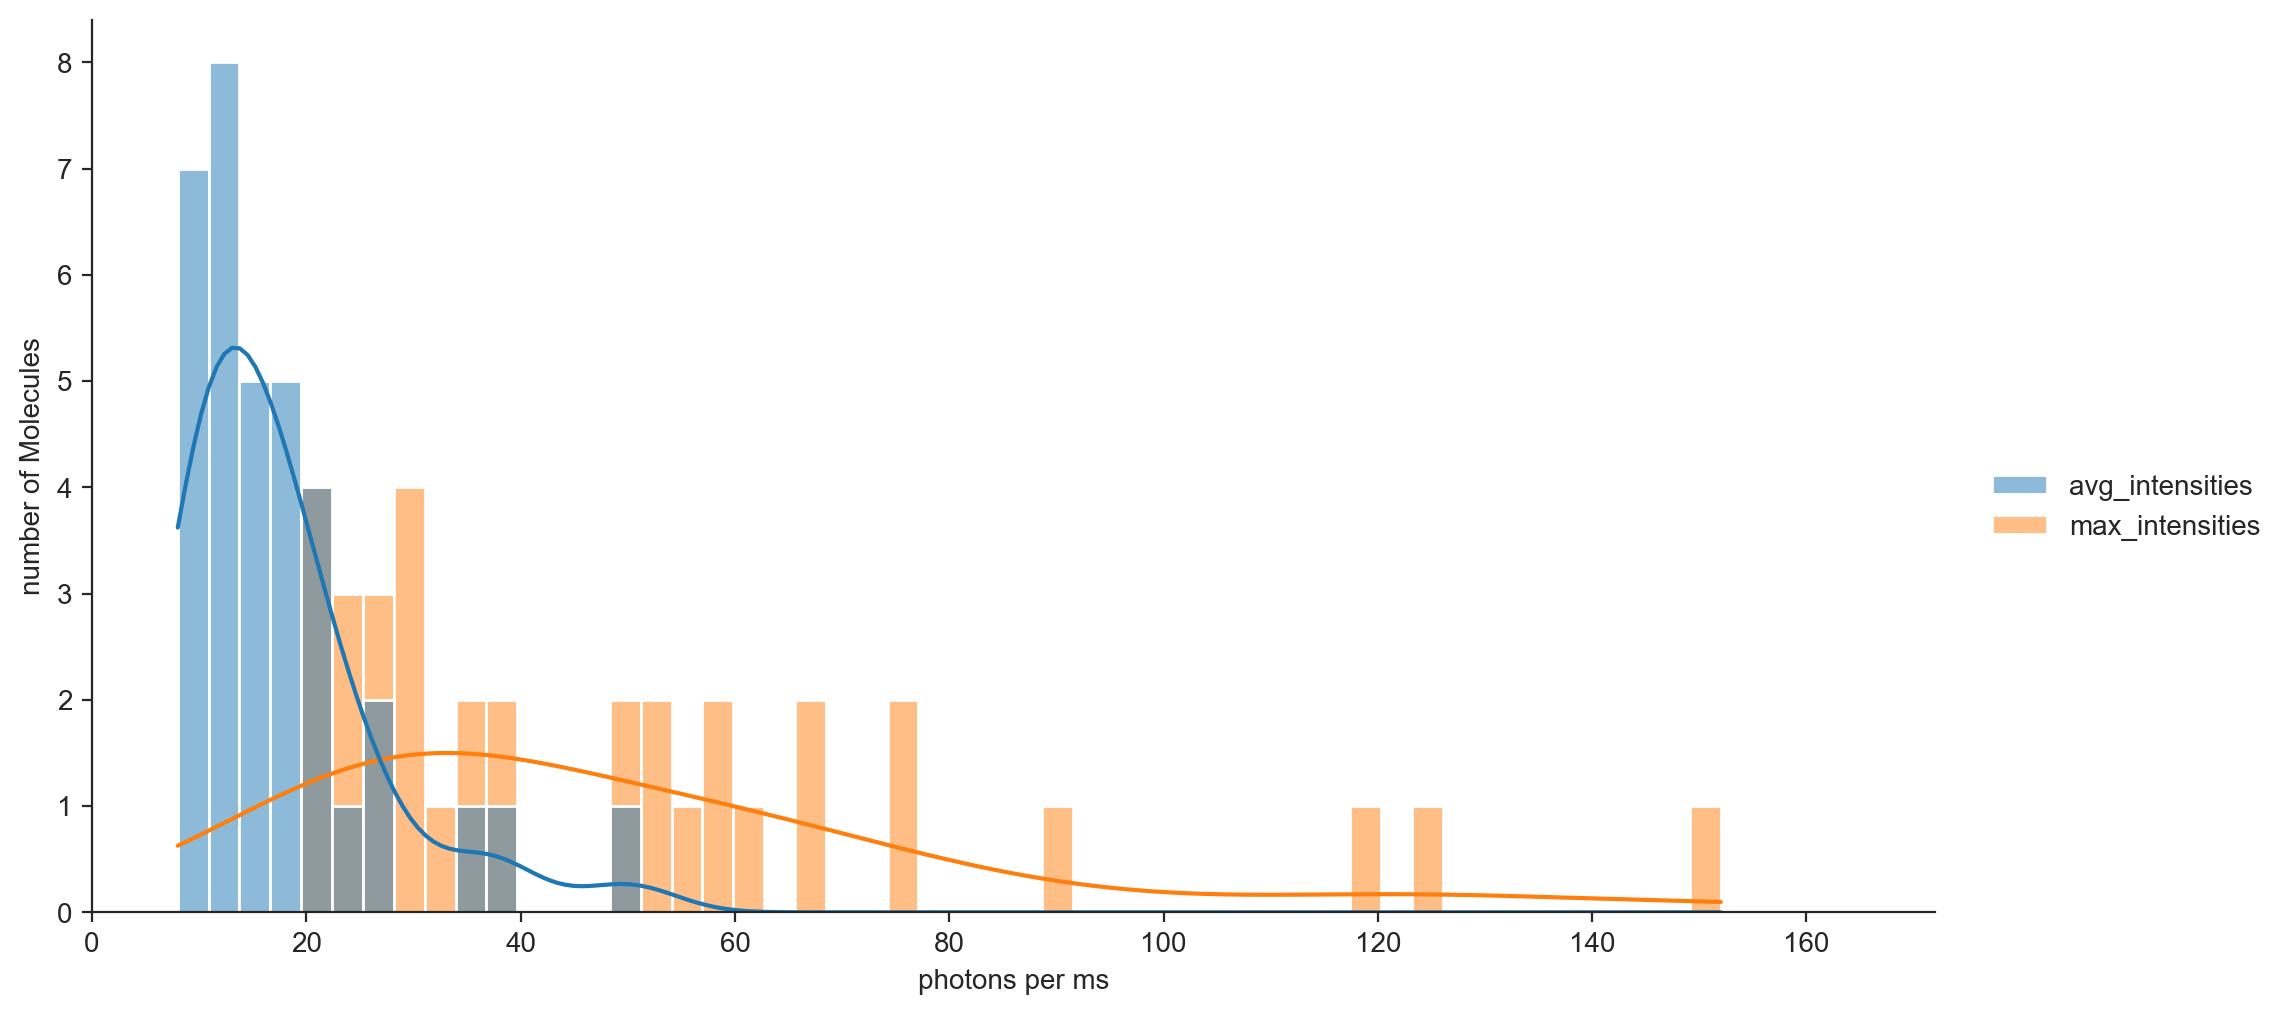

In [38]:
import seaborn as sns
import pandas as pd

# Calculate histogram parameters
r_avg_intensities = [round(intensity) for intensity in avg_intensities]
r_max_intensities = [round(intensity) for intensity in max_intensities]

print(r_avg_intensities)
print(r_max_intensities)

# Create Pandas dataframe for avg_intensities and max_intensities
df = pd.DataFrame({'avg_intensities': r_avg_intensities, 'max_intensities': r_max_intensities})

if np.min(r_avg_intensities) >= np.min(r_max_intensities):
    max_bin = np.max(r_avg_intensities)
else:
    max_bin = np.max(r_max_intensities)



min_val = np.min(r_max_intensities)
max_val = np.max(r_max_intensities)

val_width = max_val - min_val
n_bins = 50
bin_width = val_width/n_bins

# Create barplot for histogram of average intensities
sns.set_style('white')
sns.displot(data=df, 
            bins=n_bins, 
            #binrange=(min_val, max_val), 
            kind='hist', 
            kde=True, 
            edgecolor='white', 
            height=5, 
            aspect=2)


# Set axis
plt.xlabel('photons per ms')
plt.ylabel('number of Molecules')
plt.tick_params(axis='both', which='both', bottom=True, left=True)
#plt.xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width))
plt.xlim(0, max_bin+20)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


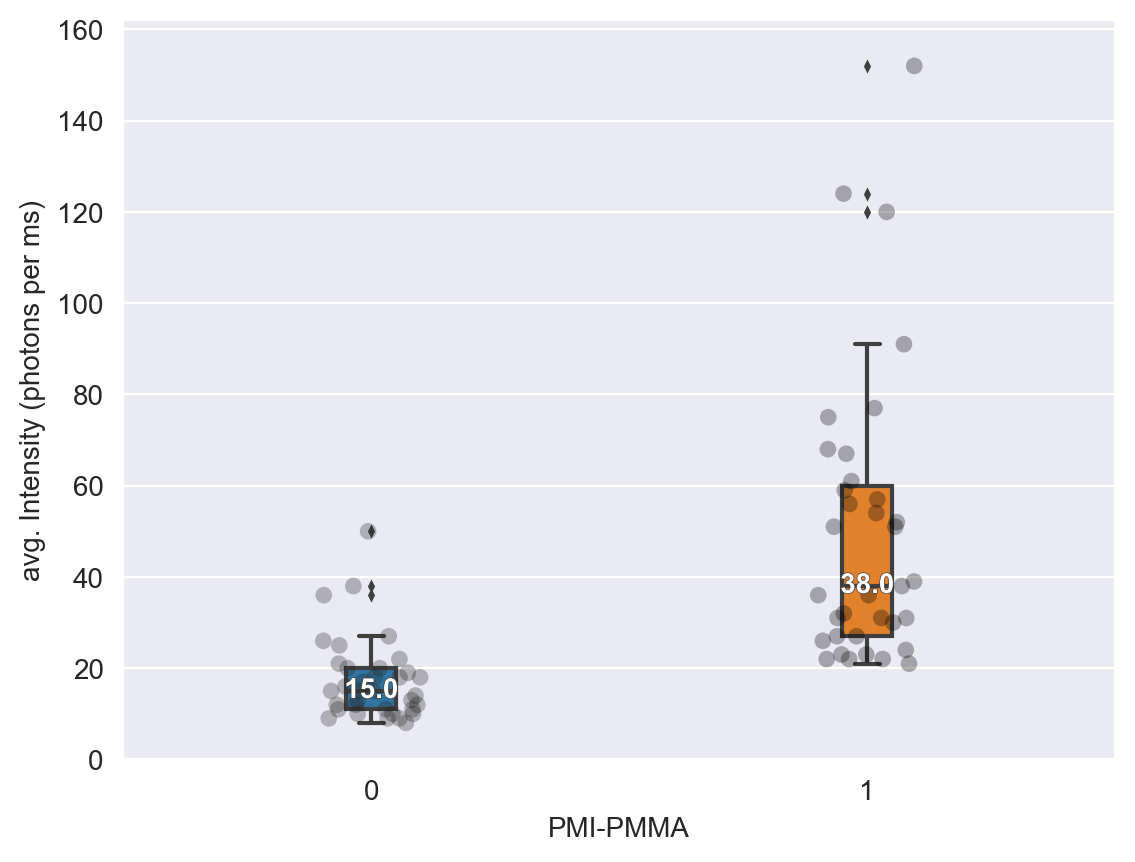

In [39]:
import matplotlib.patheffects as path_effects

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=0.5, foreground=median.get_color()),
            path_effects.Normal(),
        ])


data = [r_avg_intensities, r_max_intensities]


# Create scatter plot of average intensities
sns.set_style('darkgrid')
sns.boxplot(data=data, width=0.1, fliersize=2)
ax = sns.stripplot(
              color = 'black',
              size = 6,
              alpha = 0.3,
              data = data)




# Set axis
plt.xlabel('PMI-PMMA')
plt.ylabel('avg. Intensity (photons per ms)')
plt.ylim(0, np.max(r_max_intensities)+10)
add_median_labels(ax)
plt.show()

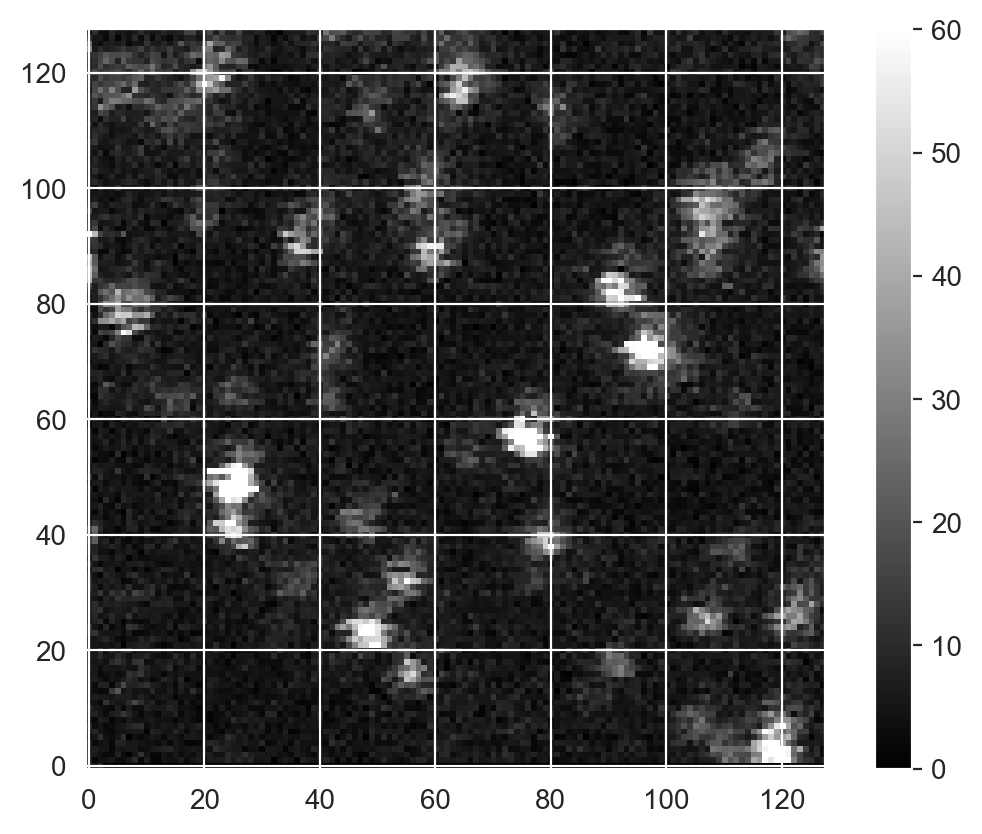

In [40]:
plt.imshow(image_array, cmap=cm.gray, vmin=0, vmax=60, origin='lower')
plt.colorbar()

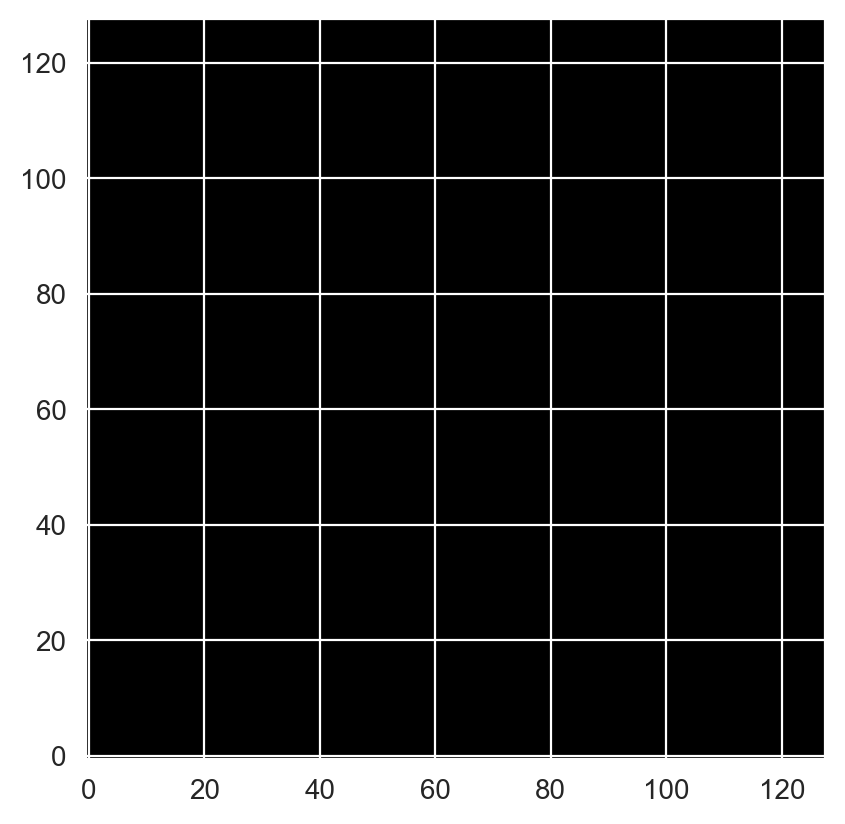

In [41]:
import numpy as np

# Create binary mask with 0's everywhere
mask = np.zeros_like(image_array)

for blob in blobs_log:
    # Get blob coordinates and radius
    y, x, r = blob

    # Extract blob pixels from original image
    blob_pixels = image_array[int(y - r):int(y + r), int(x - r):int(x + r)]

    if blob_pixels.shape[0] == blob_pixels.shape[1]: 
       # Create binary mask with 1's in region of blob
        y_min, y_max = int(y - r), int(y + r)
        x_min, x_max = int(x - r), int(x + r)
        mask[y_min:y_max, x_min:x_max] = 1

   
    

# Apply mask to image_array
masked_image = image_array * mask

# Display mask
plt.imshow(mask, cmap=cm.gray, origin='lower')

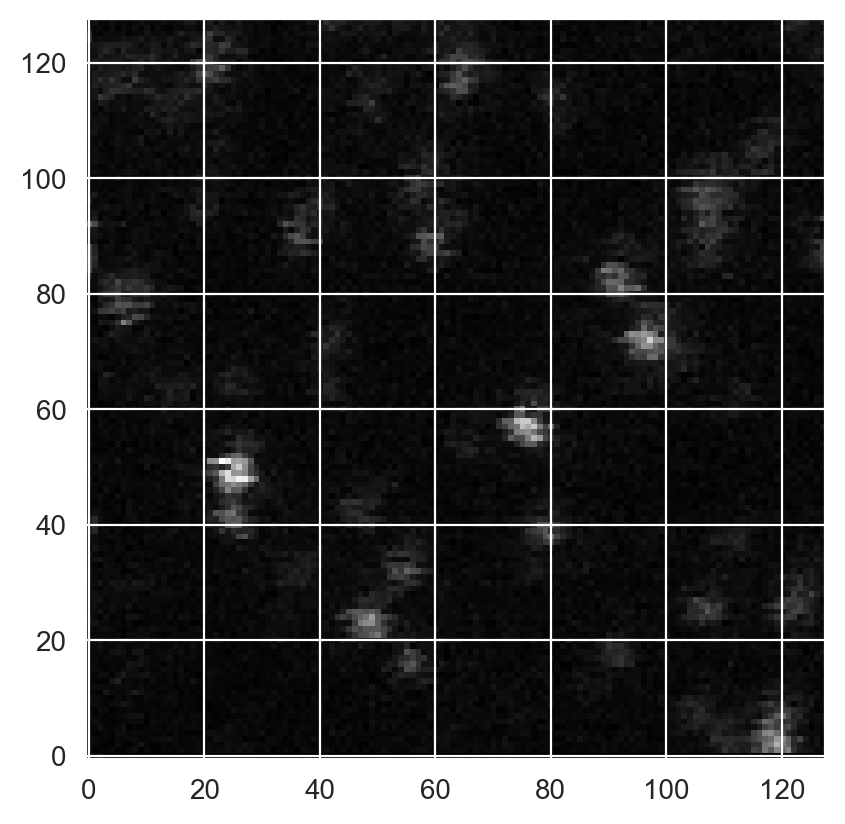

In [42]:
# Mask array with binary mask
masked_array = np.ma.masked_array(image_array, mask=mask)

# Display masked array
plt.imshow(masked_array, cmap=cm.gray, origin='lower')

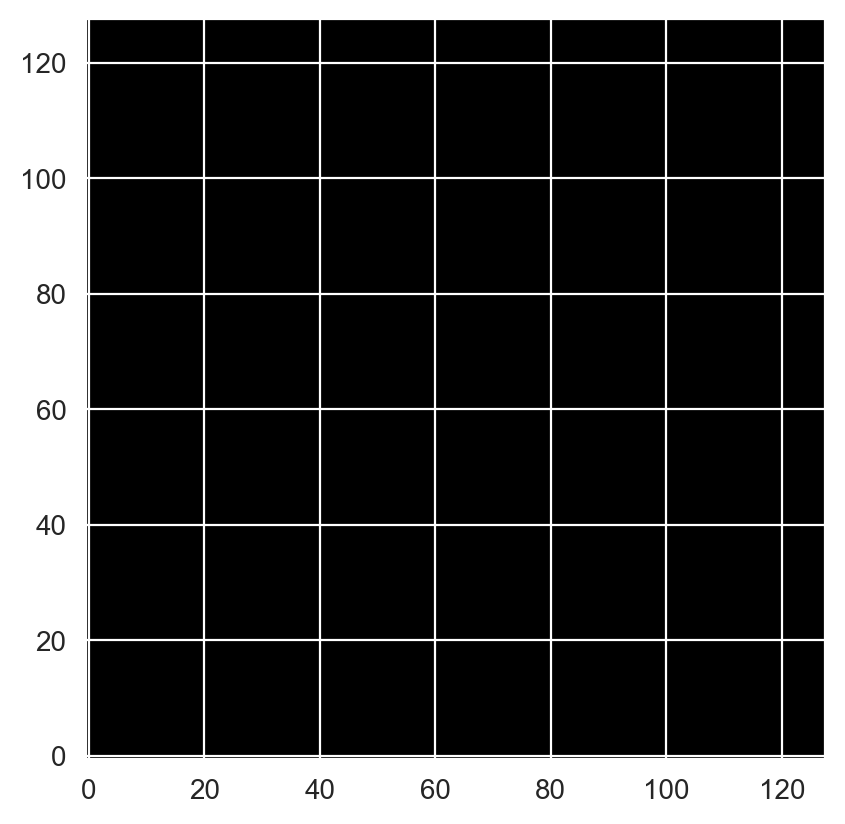

In [43]:
# Invert binary mask
inverted_mask = np.logical_not(mask)

# Mask array with binary mask
masked_array = np.ma.masked_array(image_array, mask=inverted_mask)

# Fill masked elements with 1 and set all other elements to 0
result = np.zeros_like(image_array)
result[masked_array.mask == False] = masked_array.filled(1)[masked_array.mask == False]

# Display masked array
plt.imshow(result, cmap=cm.gray, origin='lower')

In [44]:

image_gray= np.flipud(image_gray)

# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(image_gray, bins=64, range=(np.min(image_gray), np.max(image_gray)))

max_bin_index = np.argmax(histogram)
max_bin_value = bin_edges[max_bin_index]
print(max_bin_value)

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 120.0)

NameError: name 'image_gray' is not defined

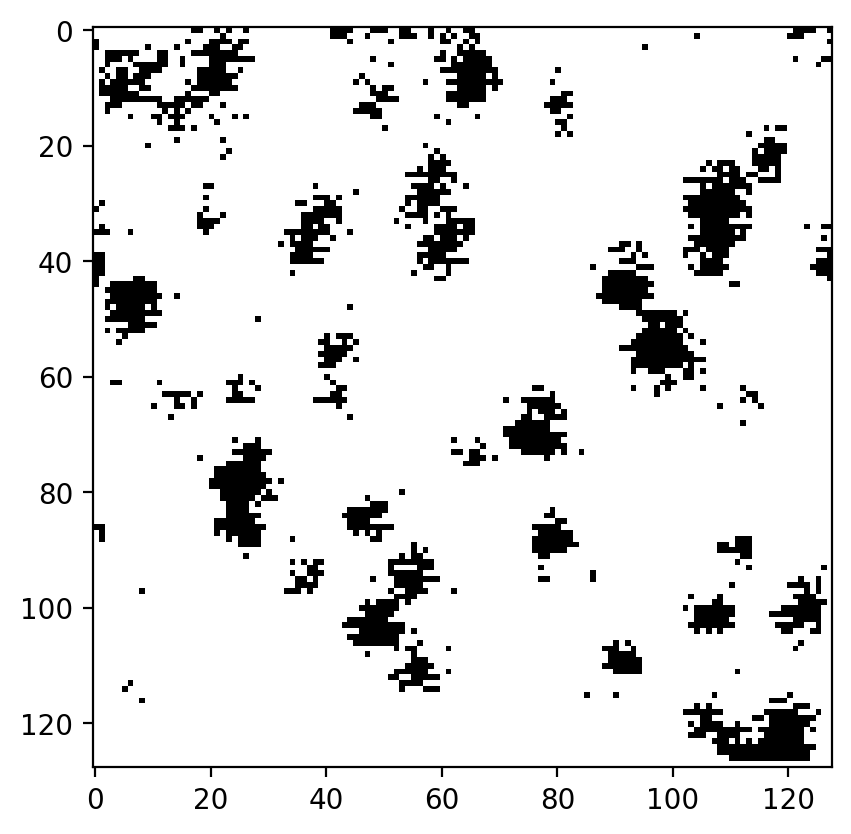

In [ ]:
# create a mask based on the threshold
t = 15
binary_mask = image_gray < t
#binary_mask= np.flipud(binary_mask)

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

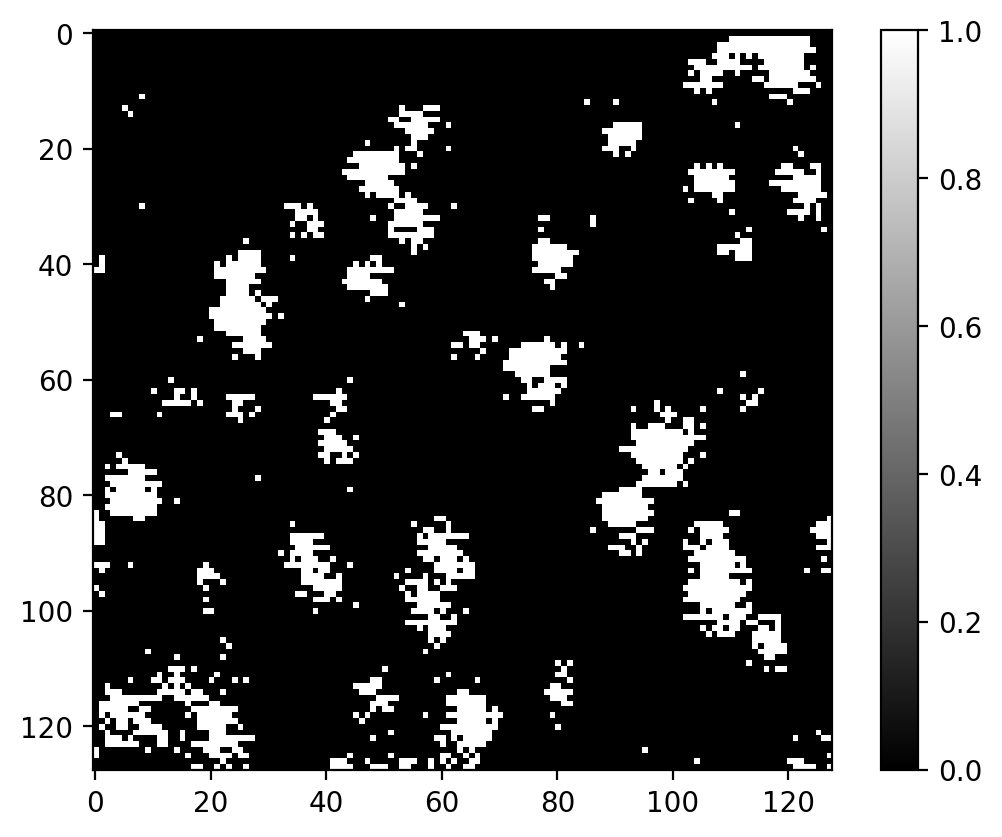

In [ ]:
#invert binary mask
inv_binary_mask= np.invert(binary_mask)
inv_binary_mask= np.flipud(inv_binary_mask)

plt.imshow(inv_binary_mask, cmap=cm.gray)
plt.colorbar()

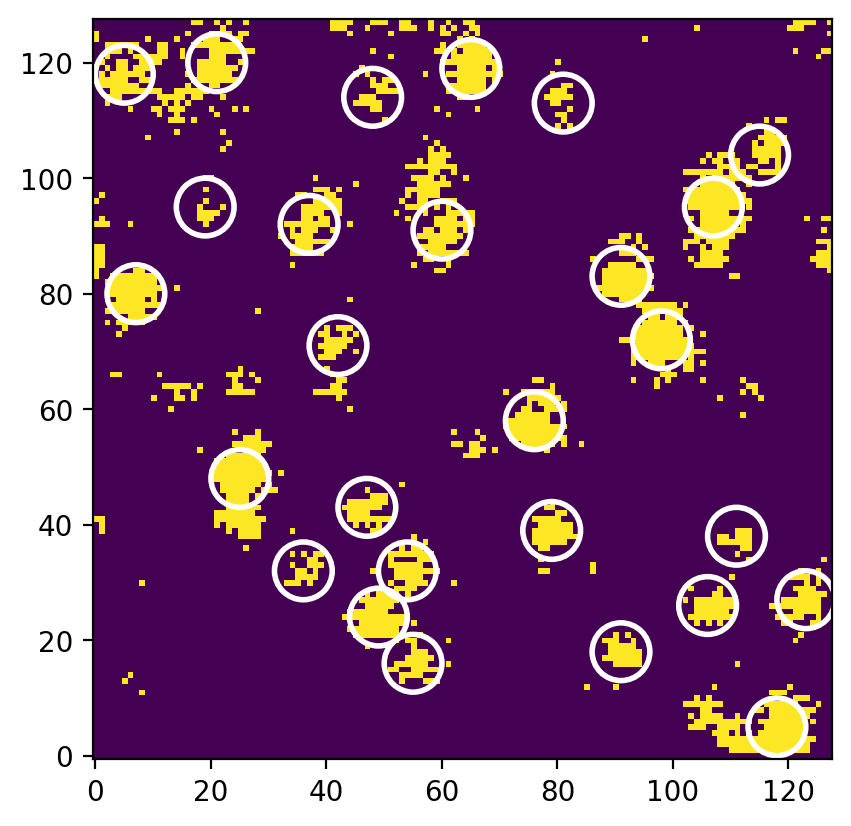

In [ ]:
blobs_log = blob_log(inv_binary_mask, min_sigma=5, max_sigma=10, num_sigma=50, threshold=.1, exclude_border=1)

ax = plt.gca()
ax.imshow(inv_binary_mask,origin='lower')
cnt = 0
while cnt < len(blobs_log):
    c = Circle((blobs_log[cnt][1], blobs_log[cnt][0]), blobs_log[cnt][2], color='white', linewidth=2, fill=False)
    ax.add_patch(c)
    cnt = cnt + 1
plt.show()

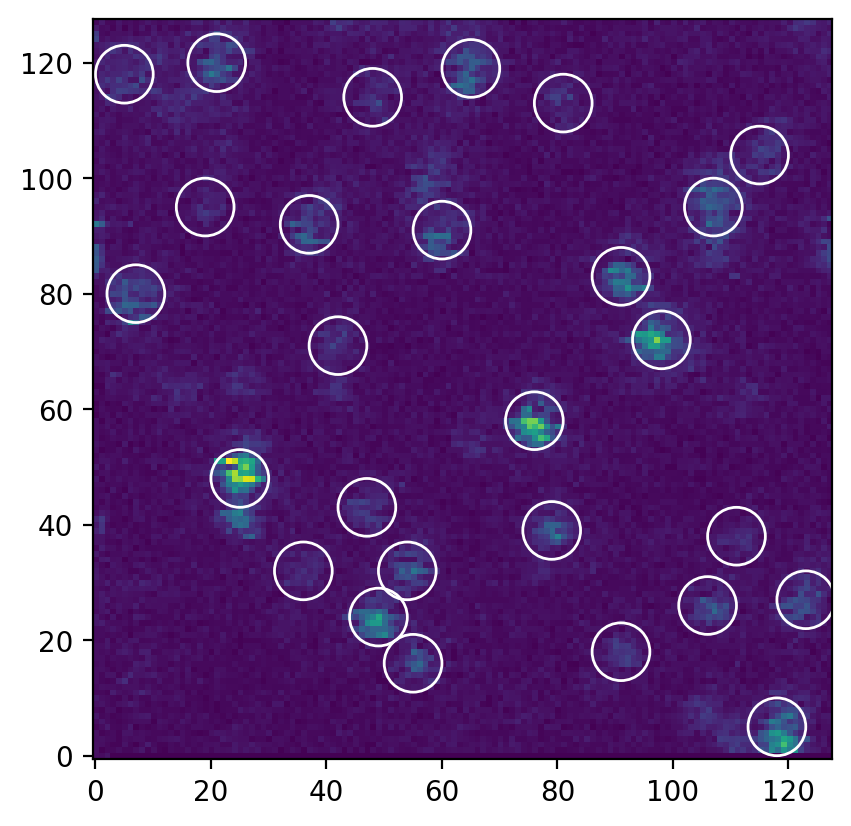

In [ ]:
image_gray= np.flipud(image_gray)
ax = plt.gca()
ax.imshow(image_gray,origin='lower')
cnt = 0
while cnt < len(blobs_log):
    c = Circle((blobs_log[cnt][1], blobs_log[cnt][0]), blobs_log[cnt][2], color='white', linewidth=1, fill=False)
    ax.add_patch(c)
    cnt = cnt + 1
plt.show()